In [29]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import random
%matplotlib inline
plt.style.use('default')

,label,thruput,max latency,latency error,mean latency
0,NONE,33332.0,13.983518,0.234509,0.030004
1,QUOTA,112251.0,753.301288,2.281337,0.012758


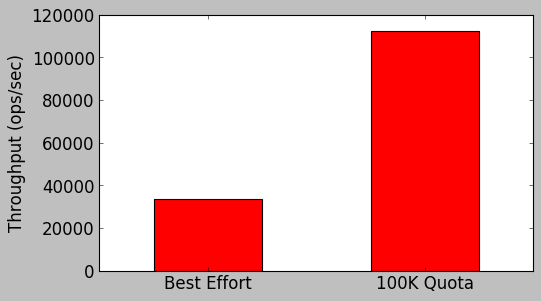

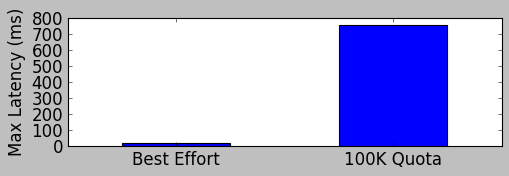

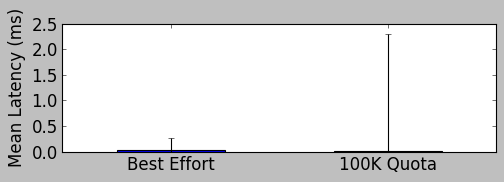

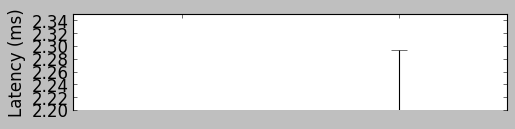

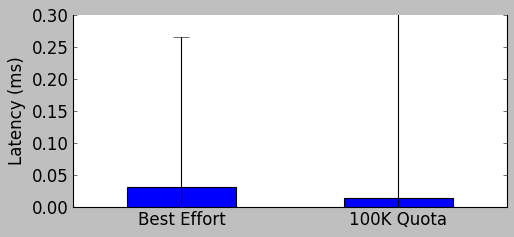

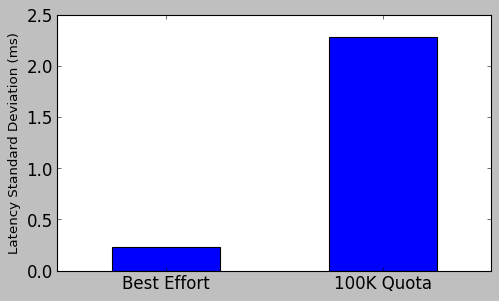

In [36]:
plt.style.use('classic')
font = {'size'   : 15}
matplotlib.rc('font', **font)
def parse_client(path):
    for word in os.path.basename(path).split('-'):
        if 'client' in word and 'same' not in word:
            return word

def stats(label, results, clients):
    df = pd.DataFrame(columns=clients)
    tput = []
    lats = []
    alat = []
    errs = []
    for client in clients:
        data = pd.read_csv(client)
        #data['ts'].apply(pd.to_numeric)
        #halfway = data['ts'].min() + ((data['ts'].max() - data['ts'].min())/2)      
        #data = data[data.ts < halfway]

        client = parse_client(client)        
        df[client] = data['ts']
        df['latency-' + client] = df[client] - df[client].shift(1)
        time = df[client].max() - df[client].min()
        nreq = float(len(df.index))
        tput.append(int((nreq/time)*1000000000))            # ns -> sec
        lats.append((df['latency-'+client]/1000000).max()) # ns -> ms
        alat.append((df['latency-'+client]/1000000).mean()) # ns -> ms        
        errs.append((df['latency-'+client]/1000000).std())
    results.loc[len(results)] = [label, np.mean(tput), np.max(lats), np.max(errs), np.mean(alat)]
    return results

results = pd.DataFrame(columns=('label', 'thruput', 'max latency', 'latency error', 'mean latency'))
client0 = "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client0-issdm-24.1477027634.1"
client1 = "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client1-issdm-24.1477027636.1"
results = stats("NONE", results, [client0, client1])

client0 = "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client0-issdm-24.1477011047.1"
client1 = "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client1-part0-issdm-24.1477011048.1"#results = stats("QUOTA", results, [client0, client1])
results = stats("QUOTA", results, [client0, client1])

#ax = results[['thruput', 'max latency']].plot.bar(secondary_y=['max latency'], color=['red', 'blue'])
ax = results.plot.bar(y='thruput', color='red', figsize=(7,4))
ax.set_xticklabels(['Best Effort', '100K Quota'], rotation=0)
ax.set_ylabel("Throughput (ops/sec)")
ax.legend().remove()
plt.savefig('slides-thruput.png', dpi=300, bbox_inches='tight')


ax = results.plot.bar(y='max latency', color='blue', figsize=(7,2))
ax.set_xticklabels(['Best Effort', '100K Quota'], rotation=0)
ax.set_ylabel("Max Latency (ms)")
ax.legend().remove()

ax = results.plot.bar(y='mean latency', yerr='latency error', color='blue', figsize=(7,2))
ax.set_xticklabels(['Best Effort', '100K Quota'], rotation=0)
ax.set_ylabel("Mean Latency (ms)")
ax.set_ylim(0, 2.5)
ax.legend().remove()

#f, ax = plt.subplots(2, 1, sharex=True)
ax0 = results.plot.bar(y='mean latency', yerr='latency error', capsize=7, color='blue', figsize=(7, 1.5))
ax0.set_xticklabels([])
ax0.set_ylim(2.2, 2.35)
ax0.legend().remove()
ax0.set_ylabel("Latency (ms)")
ax0.xaxis.tick_top()
ax0.tick_params(labeltop='off')  # don't put tick labels at the top
ax0.spines['bottom'].set_visible(False)
plt.savefig('slides-latency-a.png', dpi=300, bbox_inches='tight')


ax1 = results.plot.bar(y='mean latency', yerr='latency error', capsize=7, color='blue', figsize=(7, 3))
ax1.set_ylim(0, 0.3)
ax1.legend().remove()
ax1.set_xticklabels(['Best Effort', '100K Quota'], rotation=0)
ax1.set_ylabel("Latency (ms)")
ax1.xaxis.tick_bottom()
ax1.spines['top'].set_visible(False)
plt.savefig('slides-latency-b.png', dpi=300, bbox_inches='tight')

ax1 = results.plot.bar(y='latency error', color='blue', figsize=(7, 4))
ax1.legend().remove()
ax1.set_xticklabels(['Best Effort', '100K Quota'], rotation=0)
ax1.set_ylabel("Latency Standard Deviation (ms)", fontsize=12)
plt.savefig('slides-latency.png', dpi=300, bbox_inches='tight')


results

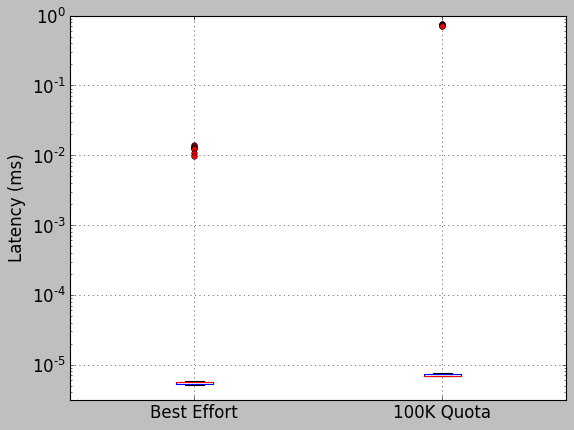

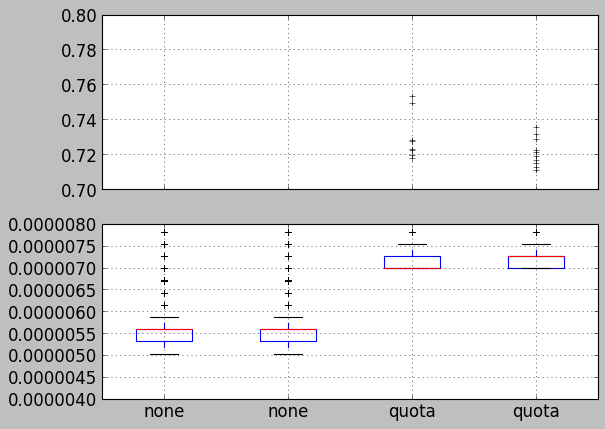

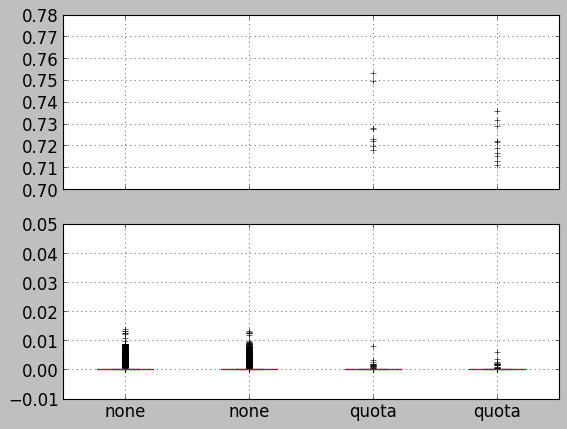

In [44]:
def stats(label, results, clients):
    df = pd.DataFrame()
    tputs = []
    lats = []
    for client in clients:
        data = pd.read_csv(client)
        #data['ts'].apply(pd.to_numeric)
        #halfway = data['ts'].min() + ((data['ts'].max() - data['ts'].min())/2)      
        #data = data[data.ts < halfway]

        client = parse_client(client)        
        df[client] = data['ts']
        df['latency-' + client] = (df[client] - df[client].shift(1))/1000000000
        time = df[client].max() - df[client].min()
        nreq = float(len(df.index))
        #tput = int((nreq/time)*1000000000)
        tputs.append(int((nreq/time)*1000000000))
        lats.append(df['latency-'+client].max()/1000000000)
        #results.loc[len(results)] = [label, tput, df['latency-'+client].max()/1000000000, df['latency-'+client].std()] 
    #results.loc[len(results)] = [label, np.mean(tputs), np.max(lats), df['latency-'+client].std()]
    results.loc[len(results)] = [label, np.mean(tputs), np.percentile(lats, 50), df['latency-'+client].std()]        
    return df
results = pd.DataFrame(columns=('label', 'thruput', 'max latency', 'latency error'))
client0 = "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client0-issdm-24.1477011047.1"
client1 = "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client1-part0-issdm-24.1477011048.1"#results = stats("QUOTA", results, [client0, client1])
df = stats("QUOTA", results, [client0, client1])
#df.boxplot(column='latency-client0')
#df.boxplot(column='latency-client0')

results = pd.DataFrame(columns=('label', 'thruput', 'max latency', 'latency error'))
client0 = "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client0-issdm-24.1477027634.1"
client1 = "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client1-issdm-24.1477027636.1"
df2 = stats("QUOTA", results, [client0, client1])
df2['latency_quota-client0'] = df['latency-client0']
df2['latency_quota-client1'] = df['latency-client1']
ax = df2[['latency-client0', 'latency_quota-client0']].boxplot(showfliers=False)
ax.set_xticklabels(['Best Effort', '100K Quota'])

maxes = df2.nlargest(8, 'latency-client0')
for index, row in maxes.iterrows():
    ax.plot(1, row['latency-client0'], 'or', markersize=5)

maxes = df2.nlargest(8, 'latency_quota-client0')
for index, row in maxes.iterrows():
   ax.plot(2, row['latency_quota-client0'], 'or', markersize=5)
    
ax.set_yscale('log')
ax.set_ylim(10**-5.5, 10**0)
ax.set_ylabel('Latency (ms)')
plt.savefig('slides-latency-boxplot.png', dpi=300, bbox_inches='tight')


f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
df2[['latency-client0', 'latency-client1', 'latency_quota-client0', 'latency_quota-client1']].boxplot(ax=ax)
df2[['latency-client0', 'latency-client1', 'latency_quota-client0', 'latency_quota-client1']].boxplot(ax=ax2)
ax.set_ylim(0.7, 0.8)
ax2.set_ylim(0.000004, 0.000008)
ax2.set_xticklabels(['none', 'none', 'quota', 'quota'])

#ax.set_yscale('log')

#df2[['latency-client0', 'latency-client1', 'latency_quota-client0', 'latency_quota-client1']].hist()
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)
df2[['latency-client0', 'latency-client1', 'latency_quota-client0', 'latency_quota-client1']].boxplot(ax=ax)
df2[['latency-client0', 'latency-client1', 'latency_quota-client0', 'latency_quota-client1']].boxplot(ax=ax2)
ax.set_ylim(0.7, 0.78)
ax2.set_ylim(-0.01, 0.05)
ax2.set_xticklabels(['none', 'none', 'quota', 'quota'])


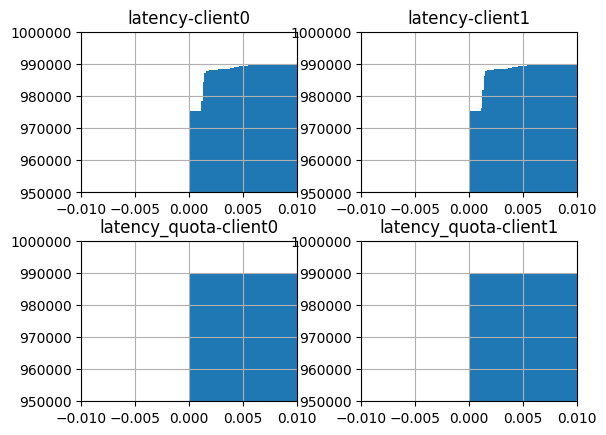

In [36]:
p = df2[['latency-client0', 'latency-client1', 'latency_quota-client0', 'latency_quota-client1']]
#p = df2['latency-client0']
ax = p.hist(cumulative=True, bins=100)

for i in [0, 1]:
    for j in [0, 1]:
        ax[i, j].set_xlim(-0.01, 0.01)
        ax[i, j].set_ylim(950000, 1000000)

,client0,latency-client0,client1,latency-client1,latency_quota-client0,latency_quota-client1
0,10893205188290955,NaN,10893206546631686,NaN,NaN,NaN
1,10893205188311906,0.020950,10893206548918415,2.286730,0.022348,716.618656
2,10893205188327270,0.015364,10893206550443925,1.525508,0.023466,0.061456
3,10893205188338165,0.010894,10893206550453423,0.009500,0.012012,0.023464
4,10893205188351853,0.013688,10893206550459010,0.005586,0.012290,0.012012


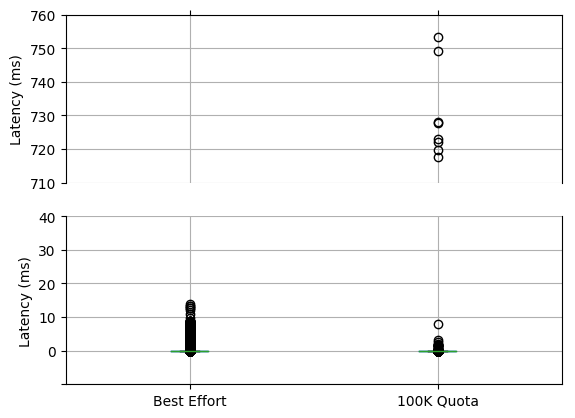

In [37]:
def all_stats(label, clients):
    df = pd.DataFrame()
    for client in clients:
        data = pd.read_csv(client)
        client = parse_client(client)        
        df[client] = data['ts']
        df['latency-'+client] = (df[client] - df[client].shift(1))/1000000
    return df

df = all_stats("QUOTA",
           ["../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client0-issdm-24.1477011047.1",
            "../results-reqdots-kill0-sameclient-capdelay-100-quota-100000/reqdots-kill0-sameclient-capdelay-100-quota-100000-run-foreground-issdm-24-reqs-client1-part0-issdm-24.1477011048.1"
           ])
df2 = all_stats("QUOTA",
            ["../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client0-issdm-24.1477027634.1",
             "../results-reqdots-sameclient/reqdots-sameclient-run-foreground-issdm-24-reqs-client1-issdm-24.1477027636.1"
            ])

df2['latency_quota-client0'] = df['latency-client0']
df2['latency_quota-client1'] = df['latency-client1']

f, (ax0, ax1) = plt.subplots(2, 1, sharex=True)
df2[['latency-client0', 'latency_quota-client0']].boxplot(ax=ax0)
df2[['latency-client0', 'latency_quota-client0']].boxplot(ax=ax1)

ax0.set_ylim(710, 760)
ax0.set_ylabel('Latency (ms)')
ax1.set_ylim(-10, 40)
ax1.set_yticklabels(['', 0, 10, 20, 30, 40, 50])
ax1.set_ylabel('Latency (ms)')
ax1.set_xticklabels(['Best Effort', '100K Quota'])

# split the graph
ax0.xaxis.tick_top()
ax0.tick_params(labeltop='off')  # don't put tick labels at the top
ax1.xaxis.tick_bottom()
ax0.spines['bottom'].set_visible(False)
ax1.spines['top'].set_visible(False)
plt.savefig('slides-latency-box.png', dpi=300, bbox_inches='tight')
df2.head()